# Лаба 3

# Метод сеток решения одномерного нестационарного уравнения теплопроводности

## Необходимые импорты

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plot
import matplotlib.patches as mpatches
import scipy.integrate as intg
from collections import namedtuple

HeatSource = namedtuple("HeatSource", "power location")

## Задание 1

Промоделировать стационарные процессы теплопроводности стержня в зависимости от входных данных задачи.

Стационарное уравнение теплопроводности:

$$
\begin{cases}
    -\dfrac {d}{dx}(k(x) \cdot \dfrac {du}{dx}) = f(x), \\
    u(a)=U_a, u(b)=U_b
\end{cases}    
$$

Задать точечный источник тепла можно следующим образом:
$$ f(x) = c \cdot \delta(x-x_0),$$
где $c$ - мощность источника,
$\delta(x)$ - дельта  функция,
$x_0$ - точка где располагается источник.

Решить эту задачу можно использовав интегральное уравнения баланса (при $q(x)=0$ по условию) в частном виде на отрезке $[a, b]$:

$$ W(a) - W(b) + \int_{a}^{b} f(x)dx = 0, $$ где $W(x) = -k(x) \dfrac{du}{dx}$ - плотность потока тепла.

Далее посторим разностную схему:

$$ x_n = n \cdot h, n = 0, 1, ..., N $$

с промежуточными, так называемыми, потоковыми узлами:

$$ x_{n \pm 0.5} = x_n \pm 0.5h $$

Запишем уравнение баланса на промежутке $[x_{n-0.5}, x_{n+0.5}]$:

$$ W(x_{n-0.5}) - W(x_{n+0.5}) + \int_{x_{n-0.5}}^{x_{n+0.5}} f(x)dx = 0 $$

Далее нехитрыми преобразованиями получаем:

$$ W(x_{n-0.5}) = -a_n \cdot \dfrac {u_n - u_{n-1}}{h} $$

$$ a_n=h \cdot ({\int_{x_{n-1}}^{x_n} \dfrac {dx}{k(x)}})^{-1} $$

$$ W(x_{n+0.5}) = -b_n \cdot \dfrac {u_{n+1} - u_{n}}{h} $$

$$ b_n = h \cdot (\int_{x_n}^{x_{n+1}} \dfrac {dx}{k(x)})^{-1} $$

$$ \phi_n = \dfrac {1}{h} \cdot \int_{x_{n-0.5}}^{x_{n+0.5}} f(x)dx = \dfrac {1}{h} \cdot \int_{x_{n-0.5}}^{x_{n+0.5}} c \cdot \delta(x-x_0) dx $$

Подставляем в исходное уравнение и получаем:

$$
\begin{cases}
    \dfrac {1}{h} \cdot (b_n \dfrac {u_{n+1} - u_{n}}{h} - a_n \dfrac {u_n - u_{n-1}}{h}) = -\phi_n, n = 1, 2, ..., N-1, \\
    u_0=U_0, u_N=U_N
\end{cases}
$$

Преобразуем и получим:

$$
\begin{cases}
   \dfrac {1}{h^2} \cdot (-a_n u_{n-1} + (a_n + b_n)u_n - b_n u_{n+1}) = \phi_n, n = 1, 2, ..., N-1, \\
    u_0=U_0, u_N=U_N
\end{cases}
$$

Данная разностная схема аппроксимирует исходное уравнение с порядком $O(h^2)$.

In [2]:
x_0 = 0
x_n = 1

u_0 = 0
u_n = 0

N = 151
h = (x_n - x_0) / (N - 1)
print(f"Шаг h = {h:.3}")

Шаг h = 0.00667


In [3]:
def accuracy_for(element):
    return round(element, 5)

def delta(x_a, x_b, x0):
    return 1 if abs(x_a - x0) <= h/2 else 0

def phi(c, x_a, x_b, x0):
    return c/h * delta(x_a, x_b, x0) 

def k(x):
    if len(k_list) == 1:
        return k_list[0]
    
    if len(k_list) == 2:
        def k2(x):
            if x_0 <= x <= 1/2 * (x_n + x_0):
                return k_list[0]
            else:
                return k_list[1]
        return k2(x)
    
    elif len(k_list) == 3:
        def k3(x):
            if x_0 <= x <= x_0 + 1/3 * (x_n + x_0):
                return k_list[0]
            elif x_0 + 1/3 * (x_n + x_0) <= x <= x_0 + 2/3 * (x_n - x_0):
                return k_list[1]
            else:
                return k_list[2]
        return k3(x)

def kk(x):
    return 1/k(x)
    
def a(i, x_list):
     return h / intg.quad(kk, x_list[i - 1], x_list[i])[0]
    
def b(i, x_list):
    return h / intg.quad(kk, x_list[i], x_list[i + 1])[0]

def solution(x: list, heat_sources):
    matrix = np.zeros((N, N))
    vector = np.zeros(N)
    matrix[0, 0] = matrix[-1, -1] = 1
    vector[0], vector[-1] = u_0, u_n
    for i in range(1, N - 1):
        matrix[i, i - 1] = -1/h**2 * a(i, x)
        matrix[i, i] = 1/h**2 * (a(i, x) + b(i, x))
        matrix[i, i + 1] = -1/h**2 * b(i, x)
        vector[i] = sum(phi(c, x[i], x[i + 1], x0) for c, x0 in heat_sources)
    return np.linalg.solve(matrix, vector)

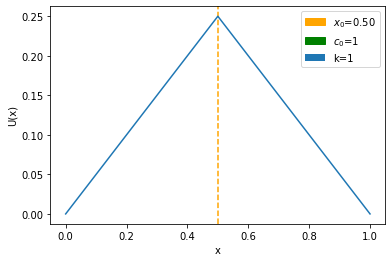

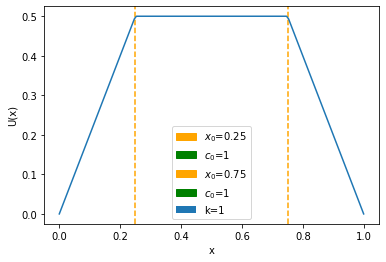

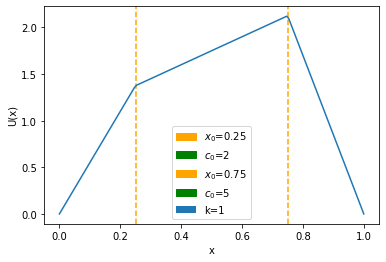

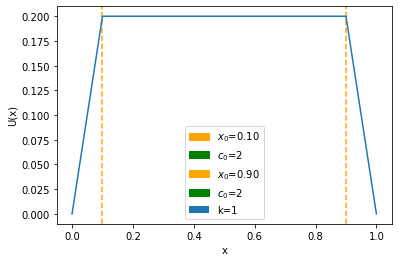

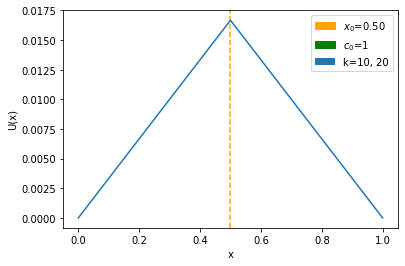

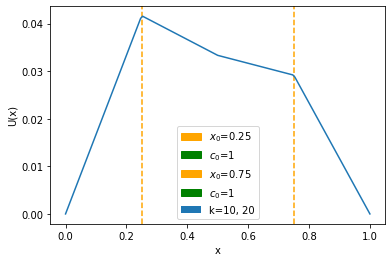

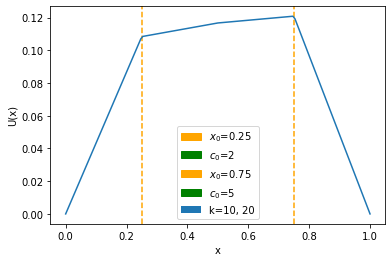

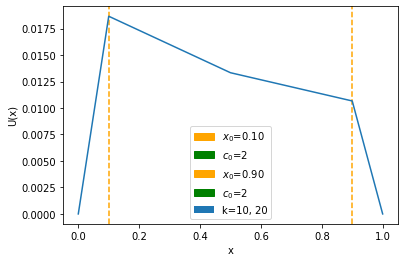

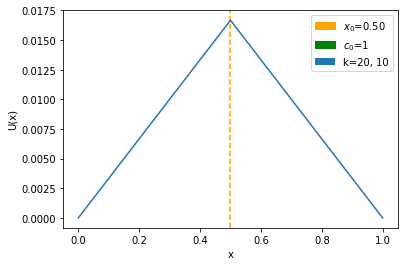

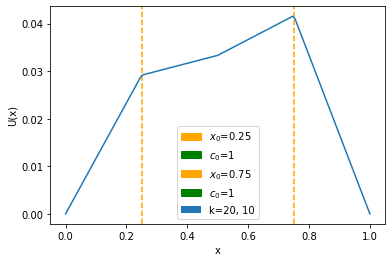

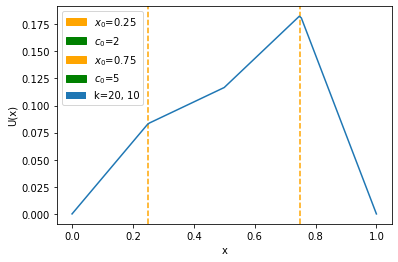

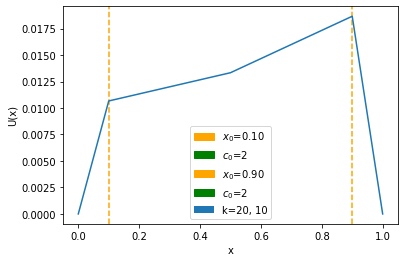

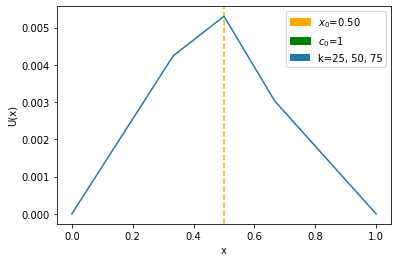

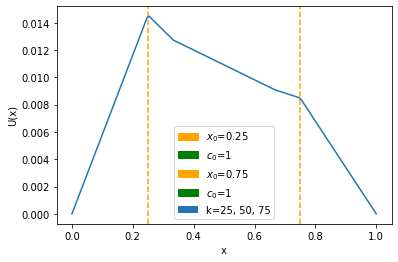

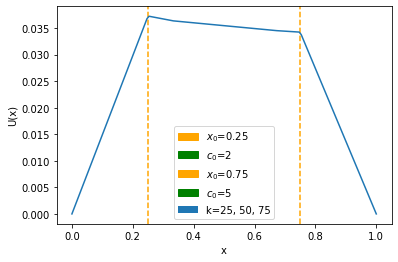

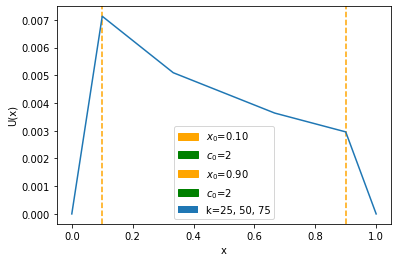

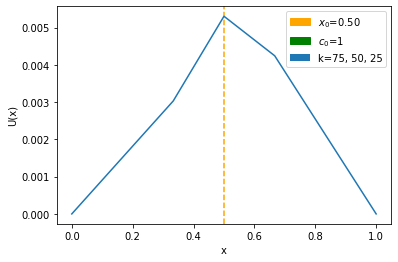

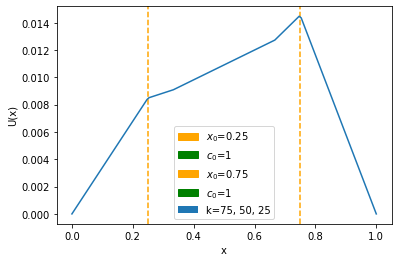

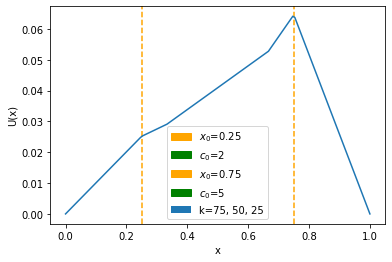

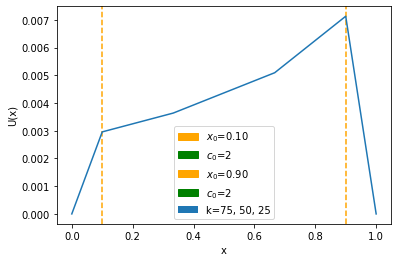

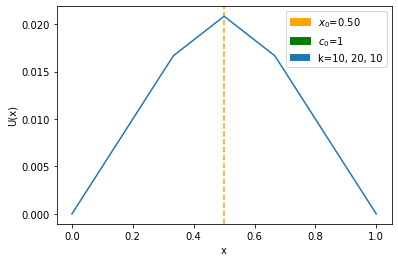

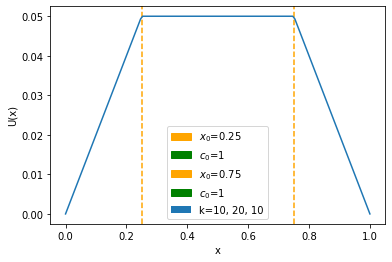

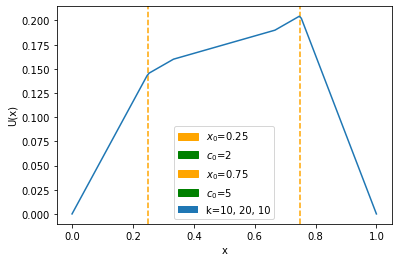

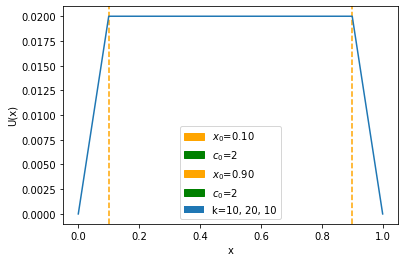

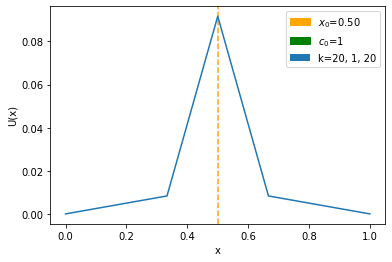

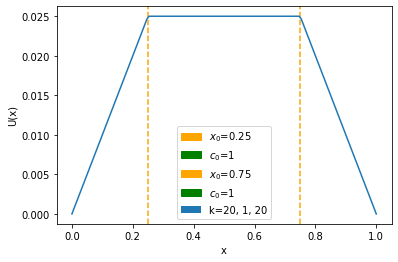

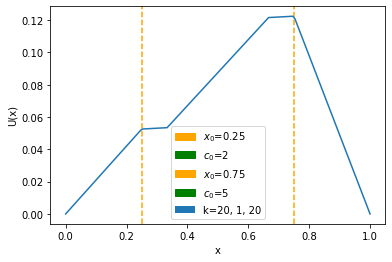

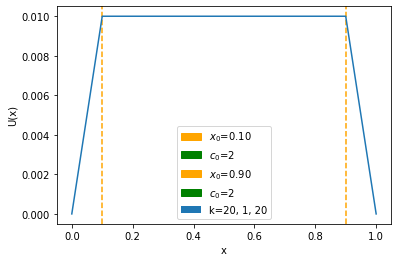

In [4]:
k_super_list = [
    [1],
    [10, 20],
    [20, 10],
    [25, 50, 75],
    [75, 50, 25],
    [10, 20, 10],
    [20, 1, 20]
]

heat_sources = [
    [
        HeatSource(power=1, location=x_0 + (x_n - x_0) / 2)
    ],
    [
        HeatSource(power=1, location=x_0 + (x_n - x_0) / 4),
        HeatSource(power=1, location=x_n - (x_n - x_0) / 4)
    ],
    [
        HeatSource(power=2, location=x_0 + (x_n - x_0) / 4),
        HeatSource(power=5, location=x_n - (x_n - x_0) / 4)
    ],
    [
        HeatSource(power=2, location=x_0 + 0.1),
        HeatSource(power=2, location=x_n - 0.1)
    ]
]

x = [accuracy_for(x_0 + h * i) for i in range(N)]

for k_i in k_super_list:
    k_list = k_i
    for heat_source in heat_sources:
        y = solution(x, heat_source)
        patches = []
        for point in heat_source:
            plot.axvline(x=point.location, color='orange', linestyle='--')
            patches.append(mpatches.Patch(color='orange', label=fr'$x_0$={point.location:.2f}'))
            patches.append(mpatches.Patch(color='green', label=fr'$c_0$={point.power}'))
        plot.plot(x, y)
        patches.append(mpatches.Patch(label=f"k={', '.join(map(str, k_list))}"))
        plot.xlabel("x")
        plot.ylabel("U(x)")
        plot.legend(handles=patches)
        plot.show()

## Задание 2

Промоделировать нестационарные процессы теплопроводности для уравнения:

$$
\begin{cases}
    \dfrac {\partial u}{\partial t} = \dfrac {\partial}{\partial x} (k(x) \dfrac {\partial u}{\partial x}) + f(x) \cdot (1-e^{-t}), a < x < b, 0 < t < T, \\
    u(a, t)=U_a, u(b, t)=U_b, 0 \le t \le T, \\
    u(x, 0)=\phi(x), a \le x \le b. 
\end{cases}  
$$

Для решения уравнения используем явную разностную схему.

Распишем производную произведения в конечных разностях:

$$
    \dfrac {\partial}{\partial x} (k(x) \dfrac {\partial u}{\partial x}) = \dfrac {k(x+0.5h) \cdot u'(x+0.5h, t)-k(x-0.5h) \cdot u'(x-0.5h, t)} {h}
$$

Здесь:

$$ u'(x+0.5h, t) = \dfrac {u(x+h, t) - u(x, t)} {h}$$ 

$$u'(x-0.5h, t) = \dfrac {u(x, t) - u(x-h, t)}{h} $$

Подставим и получим:

$$\dfrac {\partial}{\partial x} (k(x) \dfrac {\partial u}{\partial x}) = \dfrac {k(x+0.5h) \cdot u(x+h, t) + k(x-0.5h) \cdot u(x-h, t) - u(x, t) \cdot (k(x+0.5h) + k(x-0.5h))} {h^2}$$

Распишем производную по времени:

$$ \dfrac {\partial u}{\partial t} = \dfrac {u(x, t+\tau) - u(x, t)} {\tau}  $$


Подставляем в исходное уравнение и получаем:

$$
    u(x, t + \tau) = \dfrac {1} {h^2} \cdot (C_1 \cdot u(x+h, t) + C_2 \cdot u(x-h, t) + C_3 \cdot u(x, t) + \tau \cdot f(x) \cdot (1 - e^{-t})
$$


Где: 
$$  C_1 = \tau \cdot k(x+0.5h)$$
$$C_2 = \tau \cdot k(x-0.5h) $$
$$C_3 = (h^2 - \tau \cdot (k(x+0.5h) + k(x-0.5h)) $$

In [5]:
def k(x):
    return 1/x**2

def f(x):
    return -2 * x**2 - 2 * x

def phi(x):
    return -200 * x**2 + 404 * x - 150

In [6]:
h = 0.01
a = 0.5
b = 1.5
U_a = 2
U_b = 6

In [7]:
N = int((b - a) / h) + 1
x = np.linspace(a, b, N)

Из условия устойчивости $ \tau < \dfrac {h^2}{2 \cdot k} $

In [8]:
tau = h**2 / (2 * max(k(x))) / 2
T = int(0.05 / tau) + 1

print(f"\u03C4 = {tau}")

τ = 6.25e-06


In [9]:
matrix = np.zeros((T, N))
matrix[0] = phi(x)
matrix[..., 0] = U_a
matrix[..., -1] = U_b

In [10]:
for j in range(T - 1):
    for i in range(1, N - 1):
        ui_plus = 1/h**2 * tau * k(x[i] + 0.5*h) * matrix[j, i + 1]
        ui_minus = 1/h**2 * tau * k(x[i] - 0.5*h) * matrix[j, i - 1]
        ui = (1 - tau/h**2 * (k(x[i] + 0.5*h) + k(x[i] - 0.5*h))) * matrix[j, i]
        matrix[j + 1, i] = ui_plus + ui_minus + ui + tau * f(x[i]) * (1 - np.exp(-(tau * j)))

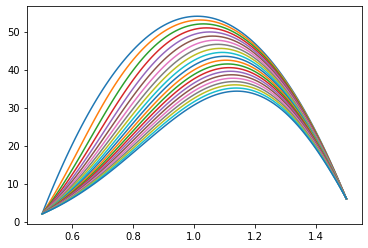

In [11]:
for i in range(0, T, 400):
    plot.plot(x, matrix[i])

## Задание 3

Решение аналлогинчо заданию 2, только $ k = const $

In [12]:
a = -1
b = 1
k = 2
T = 0.1

def g1(t):
    return 1

def g2(t):
    return 1

def f(x, t):
    return 0

def phi(x):
    return x**2

In [13]:
h = (b - a) / 10
print(f"h = {h}")

h = 0.2


In [14]:
tau = h**2 / (2 * k) / 2
print(f"\u03C4 = {tau}")

τ = 0.005000000000000001


In [15]:
Nt = int(T / tau) + 1
N = int((b - a) / h) + 1
x = np.linspace(a, b, N)

In [16]:
matrix = np.zeros((Nt, N))
matrix[0] = phi(x)
matrix[..., 0] = g1(np.linspace(0, T, Nt))
matrix[..., -1] = g2(np.linspace(0, T, Nt))

In [17]:
for j in range(Nt - 1):
    for i in range(1, N - 1):
        ui_plus = 1/h**2 * tau * k * matrix[j, i + 1]
        ui_minus = 1/h**2 * tau * k * matrix[j, i - 1]
        ui = (1 - tau/h**2 * 2*k) * matrix[j, i]
        matrix[j + 1, i] = ui_plus + ui_minus + ui + tau * f(x[i], tau * j)

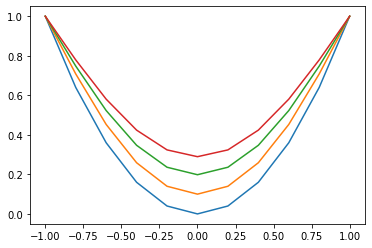

In [20]:
for i in range(0, Nt, 5):
    plot.plot(x, matrix[i])